Setup required libraries

In [2]:
!pip install tensorflow
!pip install matplotlib

Import Libraries

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(42)

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Preprocess the data

In [4]:
# Define the path to the dataset
dataset_path = 'D:/cecs456project/raw-img'

# Define the categories and labels
categories = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
house_pets = ['cane', 'gatto']

# Initialize lists to store data and labels
data = []
labels = []

# Load the data
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = 1 if category in house_pets else 0
    for img in os.listdir(category_path):
        img_path = os.path.join(category_path, img)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_array)
        labels.append(label)

# Convert lists to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Normalize the data
data /= 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Build CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


D:\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.7513 - loss: 0.5229 - val_accuracy: 0.8000 - val_loss: 0.4443
Epoch 2/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 132ms/step - accuracy: 0.8103 - loss: 0.4291 - val_accuracy: 0.8109 - val_loss: 0.4179
Epoch 3/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.8456 - loss: 0.3633 - val_accuracy: 0.8638 - val_loss: 0.3404
Epoch 4/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.8706 - loss: 0.3157 - val_accuracy: 0.8591 - val_loss: 0.3327
Epoch 5/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.8786 - loss: 0.2797 - val_accuracy: 0.8736 - val_loss: 0.3231
Epoch 6/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9011 - loss: 0.2322 - val_accuracy: 0.8736 - val_loss: 0.3290
Epoch 7/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9207 - loss: 0.1938 - val_accuracy: 0.8770 - val_loss: 0.3428
Epoch 8/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 84s 129ms/step - accuracy: 0.9355 - loss: 0

Evaluate the model

164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8643 - loss: 1.0112
Test Accuracy: 86.29%


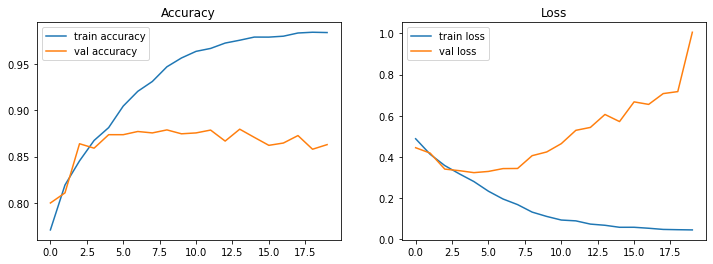

164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


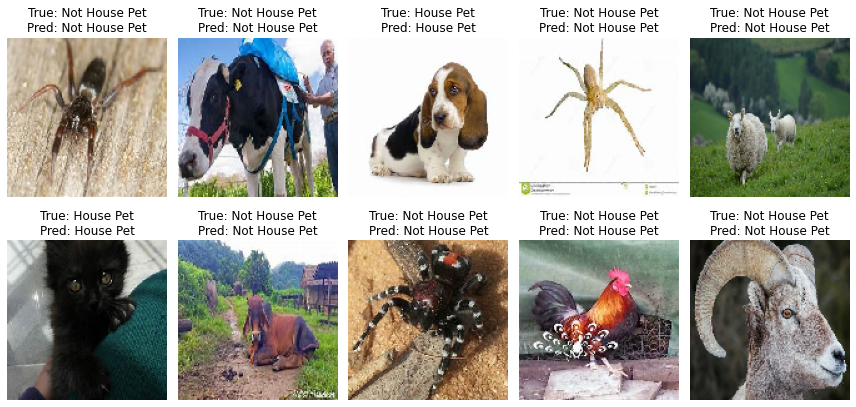

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes
y_true_classes = y_test

# Define class names
class_names = ['Not House Pet', 'House Pet']

# Randomize indices
random_indices = np.random.choice(len(X_test), size=10, replace=False)

# Plot a few test images with their predicted and true labels
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true_classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
